# Stock Prediction based on historical data using Simple Linear Regression of the following top 5 growing Tech Companies of 2019: 1) N
    

In [39]:
%matplotlib inline
import numpy as np
import pandas as pd
import datetime

import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.linear_model import LinearRegression
import datetime as dt1
from datetime import datetime as dt


In [40]:
goog=pd.read_csv('CSV Files/GOOG.csv')
goog.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-07-11,570.344116,579.259644,569.855469,577.594238,577.594238,1621700
1,2014-07-14,581.004822,583.607727,576.447388,583.268616,583.268616,1854000
2,2014-07-15,584.136230,584.201050,574.981384,583.178894,583.178894,1623000
3,2014-07-16,586.390076,586.788940,580.605957,581.064697,581.064697,1397100
4,2014-07-17,577.943237,579.399231,567.053162,572.159119,572.159119,3016500


In [41]:
goog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 7 columns):
Date         1258 non-null object
Open         1258 non-null float64
High         1258 non-null float64
Low          1258 non-null float64
Close        1258 non-null float64
Adj Close    1258 non-null float64
Volume       1258 non-null int64
dtypes: float64(5), int64(1), object(1)
memory usage: 68.9+ KB


In [42]:
goog.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,847.398494,854.557079,839.898309,847.499611,847.499611,1.748403e+06
std,224.268492,226.599404,222.185340,224.561817,224.561817,8.588947e+05
min,493.295654,494.618011,486.225067,491.201416,491.201416,5.272000e+05
25%,657.409989,664.554993,652.382477,659.865006,659.865006,1.241725e+06
50%,803.144989,806.102508,796.175018,801.415008,801.415008,1.527800e+06
75%,1058.430023,1071.092529,1047.872528,1060.269958,1060.269958,1.990200e+06
max,1274.000000,1289.270020,1266.295044,1287.579956,1287.579956,1.116490e+07


In [43]:
goog.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [44]:
goog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 7 columns):
Date         1258 non-null object
Open         1258 non-null float64
High         1258 non-null float64
Low          1258 non-null float64
Close        1258 non-null float64
Adj Close    1258 non-null float64
Volume       1258 non-null int64
dtypes: float64(5), int64(1), object(1)
memory usage: 68.9+ KB


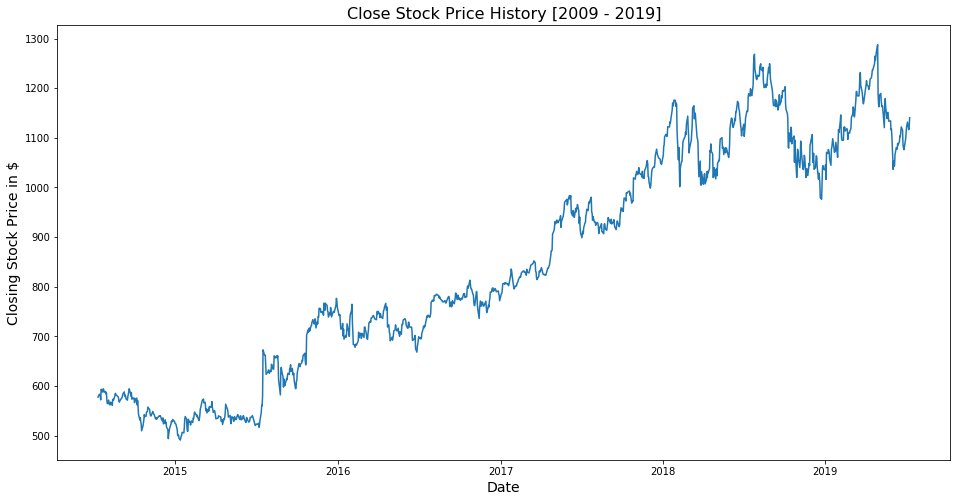

In [45]:
goog['Date'] = pd.to_datetime(goog.Date,format='%Y-%m-%d')
goog.index = goog['Date']
plt.figure(figsize=(16,8))
plt.plot(goog['Close'])
plt.title('Close Stock Price History [2009 - 2019]', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Closing Stock Price in $', fontsize=14)
fig.autofmt_xdate()
plt.show()


In [46]:

#goog = pd.DataFrame(goog, columns=['Date','Close'])

#goog = goog.reset_index()
#goog.head(25)

In [47]:
#import matplotlib.dates as mdates

#years = mdates.YearLocator() # Get every year
#yearsStr = mdates.DateFormatter('%Y') # Set year format

# Create subplots to plot graph and control axes
#fig, ax = plt.subplots()
#ax.plot(goog['Date'], goog['Close'])

# Format the ticks
#ax.xaxis.set_major_locator(years)
#ax.xaxis.set_major_formatter(yearsStr)

# Set figure title  and x/y labels
#plt.title('Close Stock Price History [2009 - 2019]', fontsize=16)
# Set x label
#plt.xlabel('Date', fontsize=14)
# Set y label
#plt.ylabel('Closing Stock Price in $', fontsize=14)

# Rotate and align the x labels
#fig.autofmt_xdate()

# Show plot
#plt.show()

In [48]:

# Import package for splitting data set
from sklearn.model_selection import train_test_split

In [49]:

# Reshape index column to 2D array for .fit() method
X_train = np.array(goog.Date).reshape(-1, 1)
y_train = goog['Close']

In [50]:

# Create LinearRegression Object
model = LinearRegression()
# Fit linear model using the train data set
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [52]:
#prin
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)

Weight coefficients:  [4.74163861e-15]
y-axis intercept:  -6188.0344091800835


In [55]:

y_min = np.array([[y.min()]])
y_max = np.array([[y.max()]])
print(f"Min Y Value: {y_min}")
print(f"Max Y Value: {y_max}")

Min Y Value: [[491.201416]]
Max Y Value: [[1287.579956]]


In [58]:
x_min = model.predict(y_min)
x_max = model.predict(y_max)

TypeError: unhashable type: 'numpy.ndarray'

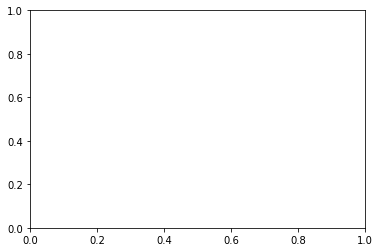

In [59]:
plt.scatter(X, y, c='blue')
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')

TypeError: Cannot cast array data from dtype('<M8[ns]') to dtype('float64') according to the rule 'safe'

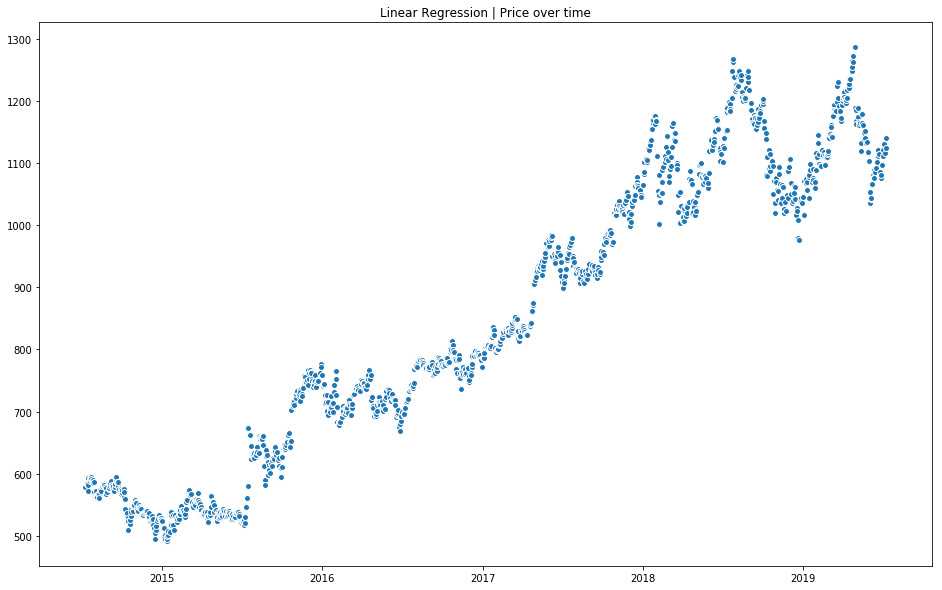

In [56]:
plt.figure(1, figsize=(16,10))
plt.title('Linear Regression | Price over time')
plt.scatter(X_train, y_train, edgecolor='w', label='Actual Price')
plt.plot(X_train, model.predict(X_train), color='r', label='Predicted Price')
plt.xlabel('Integer Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [14]:
# Create test arrays
X_test = np.array(test.index).reshape(-1, 1)
y_test = test['Close']


NameError: name 'test' is not defined

In [44]:

# Generate array with predicted values
y_pred = model.predict(X_test)

In [45]:
# Generate 25 random numbers
randints = np.random.randint(2550, size=25)

# Select row numbers == random numbers
df_sample = df[df.index.isin(randints)]

In [46]:

df_sample.head()


,index,Close
3,3,581.064697
328,328,712.950012
444,444,759.000000
608,608,771.190002
777,777,907.239990


KeyError: 'Date'

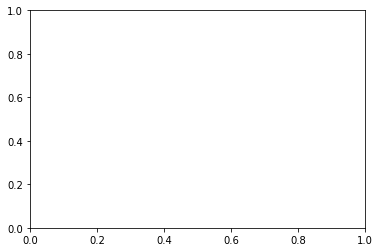

In [48]:

# Create subplots to plot graph and control axes
fig, ax = plt.subplots()
df_sample.plot(x='Date', y=['Close'], kind='bar', ax=ax)

# Set figure title
plt.title('Comparison Predicted vs Actual Price in Sample data selection', fontsize=16)

# 

# Set x label
plt.xlabel('Date', fontsize=14)

# Set y label
plt.ylabel('Stock Price in $', fontsize=14)

# Show plot
plt.show()